In [1]:
from IPython.display import HTML
from IPython.core.debugger import set_trace
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

G = 6.67*(10**-11)


In [66]:
class MakePlanet():
    
    def __init__(self, data):
    
        self.name = data[0]
        self.xpos = float(data[1])
        self.ypos = float(data[2])
        self.r = np.array([self.xpos, self.ypos])
        self.mass = float(data[3])
        self.vx = float(data[4])
        self.vy = float(data[5])
        self.v = np.array([self.vx, self.vy])
        self.a_prev = np.array([0.0,0.0])
        self.a = np.array([0.0,0.0])
        self.a_new = np.array([0.0,0.0])
        self.ke = 0
        self.pe = 0
        self.te = 0
        self.te_ = []
        
    def update_r(self,dt):
        self.r = (self.r + self.v*dt + ((1/6)*((4*self.a-self.a_prev)*(dt**2))))
    
    def update_v(self,dt):
        self.v = (self.v + ((1/6)*(2*self.a_new + 5*self.a - self.a_prev)*dt))
        self.a_prev = self.a
        self.a = self.a_new
      
    def calc_k_energy(self):
        self.ke = .5*self.mass*(norm(self.v)**2)
   
    def calc_potential_energy(self,lis,planet_index):
        self.pe = 0
        for j,thatplanet in enumerate(lis):
            if planet_index != j :
                self.pe -= G*self.mass*thatplanet.mass/(norm(self.r- thatplanet.r))
                
    def calc_tot_energy(self):
        self.te = self.pe + self.ke
        self.te_.append(self.te)

In [68]:
class MakeSimulation():
    #calc force method is in simulation
    #do i need to call body class here?
  
    def __init__(self):
        #manually create objects
        self.timesteps = 1000
        self.dt = 100000
        filename = 'Compsimfile.txt'
        data = self.read_data(filename)
        self.lis = []
#         self.xmax = 2*np.pi
        for i in range(0, 5):
            self.lis.append(MakePlanet(data[i]))
              
        self.init_accel()
    
    def read_data(self,filename):
        
        data_ = []
        with open(filename,'r') as f:
            lines = f.readlines()
            for i,line in enumerate(lines):    
                if i > 1:    
                    data = line.split(" ")
                    data_.append(data)
        return data_
    
    
    def init_accel(self):
        
        for i,thisplanet in enumerate(self.lis):
            a = np.array([0.0,0.0])
            for j,thatplanet in enumerate(self.lis):
                 
                if i != j:
                    a -= G*(thatplanet.mass)*((thisplanet.r)-(thatplanet.r))/(
                                    np.linalg.norm((thisplanet.r)-(thatplanet.r))**3)
            
            thisplanet.a = a
                                        


    def run(self):
        
        for planet in self.lis:
            planet.update_r(self.dt)
    
        self.calc_new_acc()
        
        for planet in self.lis:
            planet.update_v(self.dt)
            
        self.tot_energy()  
           
                
#use norm and change grav equation write equivalency for r vector 
    def calc_new_acc(self):
        #j.accel = 0
        for i,thisplanet in enumerate(self.lis):
            a = np.array([0.0,0.0])
            for j,thatplanet in enumerate(self.lis):
                if i != j:
                    a -= G*(thatplanet.mass)*((thisplanet.r)-(thatplanet.r))/(
                                    np.linalg.norm((thisplanet.r)-(thatplanet.r))**3)
                else:
                    a += 0
            thisplanet.a_new = a
            
    def tot_energy(self):

        
        for i,thisplanet in enumerate(self.lis):
            thisplanet.calc_k_energy()
            thisplanet.calc_potential_energy(self.lis,i)
            thisplanet.calc_tot_energy()
        
        
           
    def calc_orb(self):
        self.timesteps = 0
        for i in range(0, len(self.lis)):
            if self.lis[i].ypos != 0:
                self.timesteps += 1
            else:
                self.period = (2*self.timesteps)/(self.lis[3].timesteps)
        print(self.lis[i], "period is", self.period)
        
        
        
#     #method to graph total energy?
#     def init(self):
#         return self.patches    
    
#     '''def runSim(self):
#         theta = np.linspace(0, 2*np.pi, 500)
#         self.xpos = np.cos(theta)
#         self.ypos = np.sin(theta)
# '''
    def animate(self,i):
        G = 6.67E-11
        self.run()
        for i in range(0, len(self.patches)):
            #self.patches[i].center = (self.lis[i].xpos,self.lis[i].ypos)
            self.patches[i].center = (self.lis[i].r)
            #print((self.lis[i].xpos,self.lis[i].ypos))
        return self.patches
            
    def run_visual(self):
        fig = plt.figure()
        ax = plt.axes()
        self.patches = []
        color = ['r','b','g']
        for i in range(0, len(self.lis)):
            self.patches.append(plt.Circle(((self.lis[i].xpos,self.lis[i].ypos)), 10**10, 
                                           color = 'b', animated = True))
        for i in range(0, len(self.patches)):
            ax.add_patch(self.patches[i])
        ax.axis('scaled')
        ax.set_xlim(-3E11, 3E11)
        ax.set_ylim(-3E11, 3E11)
        numFrames = 2000
        anim = FuncAnimation(fig, self.animate,frames = numFrames, repeat=False, 
                             interval = 20, blit=True)
        plt.close(anim._fig)

    
        return anim





In [69]:
def main():
    #read in data to create planets
    '''
    names = ['Sun','Mercury','Venus','Earth','Mars']
    for i in range(0,len(names)):
        test_planet = MakePlanet(10, 0, 5E20, 10, 10)
    '''
    sim = MakeSimulation()
    anim = sim.run_visual()

    
    return anim,sim
    
anim,sim = main()
    




In [70]:
HTML(anim.to_html5_video())

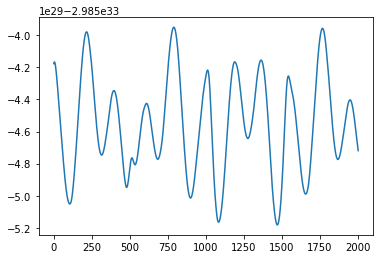

In [42]:
y_ = sim.lis[2].te_

x_ = np.arange(len(y_))

plt.plot(x_,y_)
plt.show()


2002

2002

In [80]:
length = len(sim.lis[1].te_)
y_ = np.array([0]*length,dtype = float)
for planet in sim.lis:
    
    y_ += np.array(planet.te_)
    
x_ = np.arange(len(y_))

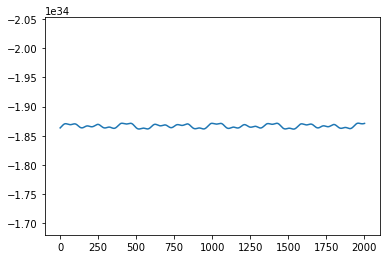

In [93]:
plt.plot(x_,y_)

mean = np.mean(y_)
y_lim_lower = ((100-10)/100)*mean
y_lim_upper = ((100+10)/100)*mean
plt.ylim(y_lim_lower,y_lim_upper)
plt.show()



In [83]:
(np.std(y_))*100/np.mean(y_)

-0.1597373995133321

In [96]:
maxim = np.max(y_)

minim = min(y_)

In [99]:
(maxim-minim)*100/mean



-0.5446477169404946